In [1]:
from math import*
from random import*
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
!pip install autopep8
!pip install pylint


On standardise le fichier Vasicek.py au format auotopep

Ouverture des données

In [3]:
df=pd.read_csv('courbe_ZC_280423.csv',sep=";")
df

Maturité   Taux_ZC  Discount factor
0          1  3.772165         0.963650
1          2  4.898805         0.908780
2          3  3.208315         0.909611
3          4  3.085736         0.885535
4          5  3.024378         0.861589
5          6  2.987988         0.838071
6          7  2.967194         0.814907
7          8  2.959534         0.791895
8          9  2.962252         0.768949
9         10  2.970112         0.746257
10        11  2.982236         0.723793
11        12  2.994138         0.701859
12        13  3.001110         0.680856
13        14  3.000671         0.661057
14        15  2.992713         0.642543
15        16  2.973375         0.625750
16        17  2.947596         0.610273
17        18  2.914038         0.596289
18        19  2.875250         0.583570
19        20  2.835126         0.571703
20        21  2.794968         0.560520
21        22  2.754770         0.549992
22        23  2.714527         0.540091
23        24  2.675580         0.530625
24        25  2.636573         0.521731
25        26  2.598870         0.513208
26        27  2.562465         0.505024
27        28  2.527357         0.497149
28        29  2.493544         0.489555
29        30  2.461026         0.482213
30        31  2.430027         0.475066
31        32  2.400544         0.468088
32        33  2.372239         0.461304
33        34  2.344776         0.454744
34        35  2.317818         0.448441
35        36  2.291464         0.442366
36        37  2.265951         0.436466
37        38  2.241144         0.430748
38        39  2.216910         0.425219
39        40  2.193114         0.419889
40        41  2.170053         0.414698
41        42  2.147986         0.409589
42        43  2.126720         0.404582
43        44  2.106061         0.399699
44        45  2.085816         0.394963
45        46  2.065793         0.390400
46        47  2.045801         0.386037
47        48  2.025650         0.381901
48        49  2.005149         0.378022
49        50  1.984113         0.374433
50        51  1.955818         0.372381
51        52  1.916955         0.372551
52        53  1.872496         0.374095
53        54  1.827214         0.376142
54        55  1.785592         0.377792
55        56  1.751850         0.378121
56        57  1.730073         0.376172
57        58  1.724435         0.370965
58        59  1.739542         0.361496
59        60  1.780960         0.346743

In [4]:
df.head()

Maturité   Taux_ZC  Discount factor
0         1  3.772165         0.963650
1         2  4.898805         0.908780
2         3  3.208315         0.909611
3         4  3.085736         0.885535
4         5  3.024378         0.861589

In [5]:
F=[x/100 for x in list(df.Taux_ZC)[:60:] ] #taux zéro-coupon en pourcentage#

Importation du module Vasicek

In [6]:
import Vasicek as vc
g=vc.calibration()


Estimation des paramètres

In [7]:
Paramètres=pd.DataFrame({"Régression linéaire": g.cali_vasicek_reglin(F),"Maximum de vraisemblance":g.cali_vasicek_maxvrais(F),"Estimation asymptotique":g.cali_vasicek_asymp(F)},index = ['lambda', 'mu', 'sigma'])
print("Paramètres")
Paramètres

Paramètres


Régression linéaire  Maximum de vraisemblance  Estimation asymptotique
lambda             0.140922                  0.891291                 0.298764
mu                 0.861849                  0.021733                 0.024215
sigma              0.002523                  0.154831                 0.002644

In [8]:
g.cali_vasicek_reglin(F)

(0.14092182071637027, 0.8618486244263984, 0.0025232606583656158)

In [9]:
g.cali_vasicek_maxvrais(F)

(0.8912910875887203, 0.021732776886619135, 0.15483099288263766)

In [10]:
g.cali_vasicek_asymp(F)

(0.29876407564840135, 0.02421549697660038, 0.002643686402111713)

Estimation des prix actualisés d'obligations zéro-coupon au 28/04/2023

In [12]:
X=[k for k in range(1,len(F)+1)]
Prix_obligations=pd.DataFrame({"Maturité":X,"Régression linéaire":[100*g.prix_oblig(0.03772165,0,x,0.14092182071637027, 0.8618486244263984, 0.0025232606583656158) for x in X],"Maximum de vraisemblance":[100*g.prix_oblig(0.03772165,0,x,0.8912910875887203, 0.021732776886619135, 0.15483099288263766) for x in X],"Estimation asymptotique":[100*g.prix_oblig(0.03772165,0,x,0.29876407564840135, 0.02421549697660038, 0.002643686402111713) for x in X],"Prix réels":[100*x for x  in list(df["Discount factor"])]})
print("Prix estimés des obligations au 28/04/2023")
Prix_obligations                             

Prix estimés des obligations au 28/04/2023


Maturité  Régression linéaire  Maximum de vraisemblance  \
0          1         9.111794e+01                 97.714872   
1          2         7.504372e+01                 96.086348   
2          3         5.661144e+01                 94.998603   
3          4         3.957189e+01                 94.177116   
4          5         2.588902e+01                 93.473671   
5          6         1.599086e+01                 92.821930   
6          7         9.395908e+00                 92.193865   
7          8         5.286500e+00                 91.577879   
8          9         2.864422e+00                 90.969205   
9         10         1.502090e+00                 90.365880   
10        11         7.656200e-01                 89.767087   
11        12         3.807250e-01                 89.172478   
12        13         1.853103e-01                 88.581896   
13        14         8.853226e-02                 87.995261   
14        15         4.161792e-02                 87.412526   
15        16         1.929120e-02                 86.833656   
16        17         8.833651e-03                 86.258622   
17        18         4.002391e-03                 85.687396   
18        19         1.796809e-03                 85.119954   
19        20         8.002270e-04                 84.556270   
20        21         3.539234e-04                 83.996319   
21        22         1.555918e-04                 83.440076   
22        23         6.804396e-05                 82.887516   
23        24         2.962217e-05                 82.338616   
24        25         1.284483e-05                 81.793351   
25        26         5.550723e-06                 81.251696   
26        27         2.391533e-06                 80.713629   
27        28         1.027730e-06                 80.179124   
28        29         4.406612e-07                 79.648160   
29        30         1.885744e-07                 79.120711   
30        31         8.056083e-08                 78.596755   
31        32         3.436571e-08                 78.076269   
32        33         1.464101e-08                 77.559230   
33        34         6.230659e-09                 77.045615   
34        35         2.648974e-09                 76.535401   
35        36         1.125272e-09                 76.028566   
36        37         4.776620e-10                 75.525087   
37        38         2.026326e-10                 75.024943   
38        39         8.591310e-11                 74.528110   
39        40         3.640845e-11                 74.034568   
40        41         1.542287e-11                 73.544294   
41        42         6.530879e-12                 73.057266   
42        43         2.764664e-12                 72.573464   
43        44         1.170025e-12                 72.092866   
44        45         4.950460e-13                 71.615450   
45        46         2.094146e-13                 71.141196   
46        47         8.857091e-14                 70.670083   
47        48         3.745485e-14                 70.202089   
48        49         1.583678e-14                 69.737195   
49        50         6.695375e-15                 69.275379   
50        51         2.830343e-15                 68.816621   
51        52         1.196368e-15                 68.360901   
52        53         5.056589e-16                 67.908200   
53        54         2.137084e-16                 67.458496   
54        55         9.031513e-17                 67.011770   
55        56         3.816609e-17                 66.568003   
56        57         1.612783e-17                 66.127174   
57        58         6.814874e-18                 65.689265   
58        59         2.879556e-18                 65.254255   
59        60         1.216692e-18                 64.822126   

    Estimation asymptotique  Prix réels  
0                 96.477493   96.364955  
1                 93.359312   90.878033  
2                 90.544048   90.9

In [13]:
A=list(Prix_obligations["Régression linéaire"])
B=list(Prix_obligations["Maximum de vraisemblance"])
C=list(Prix_obligations["Estimation asymptotique"])
R=list(Prix_obligations["Prix réels"])
n=len(X)

In [14]:
MAE_prix_oblig=pd.DataFrame({"MAE prix oblig maximum vraisemblance":[np.mean([abs(R[k]-B[k]) for k in range(n)])],"MAE prix oblig reg lin":[np.mean([abs(R[k]-A[k]) for k in range(n)])],"MAE prix oblig estimation asymptotique":[np.mean([abs(R[k]-C[k]) for k in range(n)])]})

MAE_prix_oblig

MAE prix oblig maximum vraisemblance  MAE prix oblig reg lin  \
0                             25.799979               48.220745   

   MAE prix oblig estimation asymptotique  
0                                 4.49727

Graphques

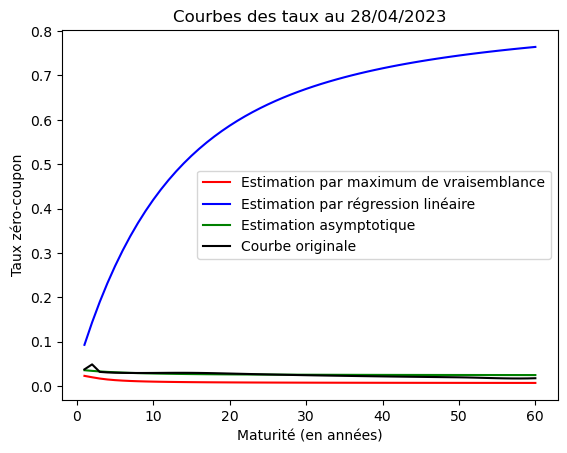

In [15]:
X=[k for k in range(1,len(F)+1)]
taux_ZC_max_vrais=[g.taux(0.03772165,0,x,0.8912910875887203, 0.021732776886619135, 0.15483099288263766) for  x in X]
taux_ZC_reglin=[g.taux(0.03772165,0,x,0.14092182071637027, 0.8618486244263984, 0.0025232606583656158) for x in X]
taux_ZC_asymp=[g.taux(0.03772165,0,x,0.29876407564840135, 0.02421549697660038, 0.002643686402111713) for x in X]


plt.plot(X,taux_ZC_max_vrais,'r',label='Estimation par maximum de vraisemblance')
plt.plot(X,taux_ZC_reglin,'b',label='Estimation par régression linéaire')
plt.plot(X,taux_ZC_asymp,'g',label='Estimation asymptotique ')
plt.plot(list(df["Maturité"]),F,'k',label="Courbe originale")
plt.xlabel("Maturité (en années)")
plt.title("Courbes des taux au 28/04/2023")
plt.ylabel("Taux zéro-coupon")
plt.legend()


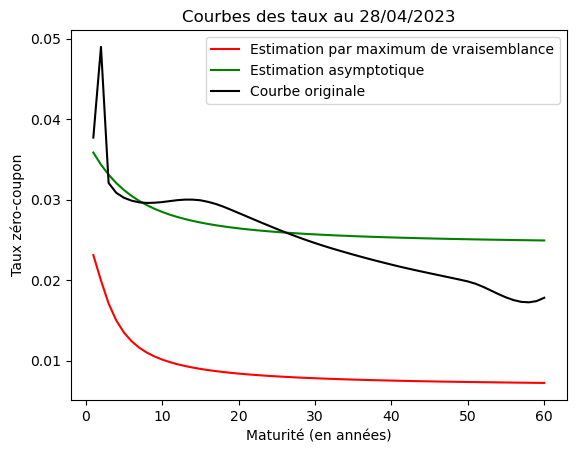

In [16]:
plt.plot(X,taux_ZC_max_vrais,'r',label='Estimation par maximum de vraisemblance')
plt.plot(X,taux_ZC_asymp,'g',label='Estimation asymptotique')
plt.plot(list(df["Maturité"]),F,'k',label="Courbe originale")
plt.xlabel("Maturité (en années)")
plt.ylabel("Taux zéro-coupon")
plt.title("Courbes des taux au 28/04/2023")
plt.legend()
plt.legend()


Métriques 

In [17]:
taux_ZC_max_vrais=np.array([g.taux(0.03772165,0,k,0.8912910875887203, 0.021732776886619135, 0.15483099288263766) for k in range(1,len(F)+1)])
Erreur_vasicek_max_vrais=abs(taux_ZC_max_vrais-np.array(F))

taux_ZC_reglin=np.array([g.taux(0.03772165,0,k,0.14092182071637027, 0.8618486244263984, 0.0025232606583656158) for k in range(1,len(F)+1)])
Erreur_vasicek_reglin=abs(taux_ZC_reglin-np.array(F))

taux_ZC_asymp=np.array([g.taux(0.03772165,0,k,0.29876407564840135, 0.02421549697660038, 0.002643686402111713) for k in range(1,len(F)+1)])
Erreur_vasicek_asymp=abs(taux_ZC_asymp-np.array(F))

MAE=pd.DataFrame({"MAE maximum de vraisemblance":[np.mean(Erreur_vasicek_max_vrais)],"MAE régression linéaire":[np.mean(Erreur_vasicek_reglin)],"MAE estimation asymptotique":[np.mean(Erreur_vasicek_asymp)]})


Erreur_vasicek_max_vrais,Erreur_vasicek_reglin,Erreur_vasicek_asymp

MAE

MAE maximum de vraisemblance  MAE régression linéaire  \
0                      0.016122                 0.578284   

   MAE estimation asymptotique  
0                     0.003185

Test


In [57]:
!pycodestyle Vasicek.py
!autopep8 --in-place --aggressive --aggressive --aggressive Vasicek.py
!pycodestyle Test.py
!autopep8 --in-place --aggressive --aggressive --aggressive Test.py


Vasicek.py:43:80: E501 line too long (81 > 79 characters)
Vasicek.py:72:80: E501 line too long (82 > 79 characters)
Vasicek.py:97:80: E501 line too long (87 > 79 characters)
Vasicek.py:149:80: E501 line too long (93 > 79 characters)
Vasicek.py:150:80: E501 line too long (111 > 79 characters)
Vasicek.py:170:80: E501 line too long (88 > 79 characters)
Vasicek.py:171:80: E501 line too long (83 > 79 characters)
Vasicek.py:175:80: E501 line too long (86 > 79 characters)
Vasicek.py:177:80: E501 line too long (116 > 79 characters)
Test.py:11:2: E225 missing whitespace around operator
Test.py:13:1: E302 expected 2 blank lines, found 1
Test.py:15:15: E225 missing whitespace around operator
Test.py:16:53: E231 missing whitespace after ','
Test.py:16:55: E231 missing whitespace after ','
Test.py:16:57: E231 missing whitespace after ','
Test.py:16:59: E231 missing whitespace after ','
Test.py:16:61: E231 missing whitespace after ','
Test.py:17:53: E231 missing whitespace after ','
Test.py:17:55: E

In [58]:
!pycodestyle Vasicek.py
!pycodestyle Test.py
!mypy Vasicek.py
!python Test.py

Vasicek.py:43:80: E501 line too long (81 > 79 characters)
Vasicek.py:72:80: E501 line too long (82 > 79 characters)
Vasicek.py:97:80: E501 line too long (87 > 79 characters)
Vasicek.py:149:80: E501 line too long (93 > 79 characters)
Vasicek.py:150:80: E501 line too long (111 > 79 characters)
Vasicek.py:170:80: E501 line too long (88 > 79 characters)
Vasicek.py:171:80: E501 line too long (83 > 79 characters)
Vasicek.py:175:80: E501 line too long (86 > 79 characters)
Vasicek.py:177:80: E501 line too long (116 > 79 characters)
Vasicek.py:4: error: Skipping analyzing "matplotlib.pyplot": module is installed, but missing library stubs or py.typed marker  [import]
Vasicek.py:4: note: See https://mypy.readthedocs.io/en/stable/running_mypy.html#missing-imports
Vasicek.py:4: error: Skipping analyzing "matplotlib": module is installed, but missing library stubs or py.typed marker  [import]
Vasicek.py:5: error: Skipping analyzing "scipy": module is installed, but missing library stubs or py.typed

....
----------------------------------------------------------------------
Ran 4 tests in 0.002s

OK
